In [7]:
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [11]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


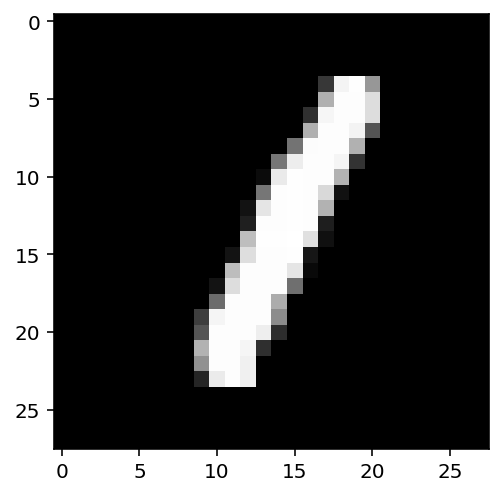

In [13]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [43]:
# First define activation/sigmoid solution
def activation(x):
    return 1 / (1 + torch.exp(-x))

## our images are 28x28 2D tensors, so conver them to 1D vectors
## (64, 1, 28, 28) to have shape of (68, 784) - 28 times 28 is 784 - This is called flattening. 
## We flattened the 2D images into 1D vectors. 
inputs = images.view(images.shape[0], -1)
print(inputs)
print(inputs.shape)

# 784 inputs to 256 hidden layers
w1 = torch.randn(784,256)
b1 = torch.randn(256)

# We need 10 output units, one for each digit. 
# 256 hidden layers to output
w2 = torch.randn(256,10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h, w2) + b2
print(out)
print(out.shape)

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])
torch.Size([64, 784])
tensor([[ -6.4289, -11.0411,   7.4325,  -2.4903,   1.3512,   0.2174,  11.7834,
         -12.8891, -21.5307,  12.5295],
        [ -5.8266,  -2.5266,  -0.7514,  -3.6550,  -1.3421,   8.7173,  13.3088,
         -13.3390, -17.7390,   8.4856],
        [ -4.4364,   1.5828,  -3.8448,  13.3142,  -9.8332,   8.0164,  21.2742,
          -7.4496,  -8.0145,   9.7302],
        [ -3.5271,   6.2561,  -2.1226,  -7.2738,  -0.8113,  10.4651,  11.3335,
         -10.0790, -15.0717,   2.9153],
        [  2.9050,  -5.6692,  10.2808,  -4.8717, -10.1304,  15.1468,   5.8452,
         -10.8871, -14.2866,  11.4886],
        [ -7.7547,  -0.3119,   6.5895,  -8.1980,   1.9337,   5.3365,  16.6351,
          -4.4

In [33]:
# Implement softmax function which can squish each input between 0 adn 1 and normalizes the value to give you
# a proper probability distribution where the probabilities sum up to one

def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

print("===== torch.exp(out) =====")
print(torch.exp(out)) # This just calculates the exp of out
print("===== torch.exp(out).shape =====")
print(torch.exp(out).shape) # torch.Size([64, 10])
print("===== torch.sum(torch.exp(out)) =====")
print(torch.sum(torch.exp(out))) # This sums up every value in matrix - WE DO NOT WANT THIS
print("===== torch.sum(torch.exp(out), dim=1) =====")
print(torch.sum(torch.exp(out), dim=1)) # This sums up every column in matrix
print("===== torch.sum(torch.exp(out), dim=1).shape =====")
print(torch.sum(torch.exp(out), dim=1).shape) # torch.Size([64])

print("===== torch.exp(x)/torch.sum(torch.exp(x), dim=1) =====") 
print(torch.exp(out)/torch.sum(torch.exp(out), dim=1)) # this throws the error


===== torch.exp(out) =====
tensor([[1.9813e+03, 1.5757e-05, 4.7632e+07, 1.0729e+00, 1.6245e-05, 2.8442e-02,
         1.4875e+09, 3.7619e-02, 2.6313e+03, 1.1134e-05],
        [8.0764e+04, 1.5898e-03, 5.9664e+05, 1.4663e-04, 2.6390e+05, 4.9549e-01,
         4.5022e+01, 4.1922e-04, 3.4036e+03, 1.1734e-04],
        [3.3468e+05, 2.5845e-02, 1.5992e+08, 3.4593e-07, 2.4197e+04, 6.6023e+01,
         6.5835e+06, 1.8130e-04, 6.2533e+03, 1.9887e-03],
        [6.1141e+08, 2.9376e-04, 2.9762e+06, 5.2143e-03, 5.1983e-01, 1.6972e+02,
         4.2322e+06, 1.0060e-02, 7.9134e+02, 1.4215e-05],
        [5.7381e+09, 5.4877e-05, 4.0590e+06, 3.6261e-01, 4.5840e-03, 4.4914e+04,
         1.1238e+09, 3.3830e-06, 1.3743e+09, 1.0238e-04],
        [2.5127e+05, 2.1852e-02, 7.6902e+04, 1.4615e+00, 3.2136e-04, 2.1473e+02,
         6.0068e+07, 5.7905e-03, 2.1085e+02, 1.1927e-05],
        [8.0502e+06, 9.6782e-06, 1.2392e+06, 1.7009e+03, 2.0682e-03, 4.7476e-02,
         1.1108e+09, 2.1125e-04, 9.4784e+01, 1.2485e-06],


RuntimeError: The size of tensor a (10) must match the size of tensor b (64) at non-singleton dimension 1

In [37]:
# HENCE
print("===== torch.sum(torch.exp(x), dim=1).view(-1,1) =====") 
print(torch.sum(torch.exp(out), dim=1).view(-1,1)) # transform to column vector

print("===== softmax(out) =====")
probabilities = softmax(out)


===== torch.sum(torch.exp(x), dim=1).view(-1,1) =====
tensor([[1.5351e+09],
        [9.4475e+05],
        [1.6687e+08],
        [6.1862e+08],
        [8.2402e+09],
        [6.0396e+07],
        [1.1201e+09],
        [1.4161e+07],
        [1.1655e+09],
        [2.5047e+08],
        [8.1495e+08],
        [4.4412e+06],
        [2.2518e+10],
        [1.3542e+08],
        [3.3990e+09],
        [9.5138e+09],
        [3.1229e+07],
        [2.7887e+09],
        [1.8979e+07],
        [1.2211e+07],
        [2.5766e+07],
        [3.9219e+08],
        [1.9260e+06],
        [5.7702e+09],
        [1.3649e+05],
        [1.3466e+06],
        [1.4866e+07],
        [9.4437e+07],
        [5.6584e+06],
        [8.7536e+07],
        [5.6910e+08],
        [1.6839e+06],
        [2.0144e+07],
        [3.4921e+08],
        [7.0303e+07],
        [1.7316e+07],
        [1.0696e+08],
        [2.2973e+09],
        [1.3475e+10],
        [1.2121e+10],
        [1.5252e+09],
        [5.5451e+05],
        [1.8967e+07],


In [42]:
# Does it have the right shape? should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print (probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [45]:
# Building Network using pytorch
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformations
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [47]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [49]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(784,128)
        self.hidden2 = nn.Linear(128,64)
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        # Hidden layer with relu activation
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.softmax(self.output(x), dim=1)
        return x

In [50]:
model = Network()
model

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [51]:
print(model.hidden1.weight)
print(model.hidden1.bias)

Parameter containing:
tensor([[-0.0296,  0.0015,  0.0289,  ...,  0.0282,  0.0238,  0.0272],
        [ 0.0073, -0.0057,  0.0164,  ..., -0.0056, -0.0097,  0.0055],
        [ 0.0302, -0.0113, -0.0105,  ...,  0.0110,  0.0150, -0.0227],
        ...,
        [-0.0026, -0.0134, -0.0199,  ...,  0.0028, -0.0030,  0.0294],
        [ 0.0264, -0.0318, -0.0277,  ...,  0.0235,  0.0020, -0.0301],
        [-0.0055,  0.0073, -0.0319,  ..., -0.0047, -0.0035, -0.0230]],
       requires_grad=True)
Parameter containing:
tensor([ 1.3761e-02, -3.3605e-03,  2.9489e-02,  3.4692e-02, -2.0832e-02,
         2.3475e-02, -2.2735e-02, -2.5507e-02, -3.4994e-02, -3.3977e-03,
         1.5690e-02, -2.7902e-02,  1.5837e-03, -1.0398e-02,  3.3992e-02,
         7.1446e-03,  2.9624e-02, -2.0032e-03, -2.8145e-02, -1.0426e-02,
         2.9980e-02,  3.4237e-02, -2.8837e-02, -2.7901e-02,  3.2859e-02,
         3.3700e-02,  5.2145e-03, -2.9165e-02, -1.7328e-02, -1.1189e-02,
        -7.8209e-04,  2.9111e-02,  2.8902e-02, -1.1310e-0

In [52]:
# For custom initialization, we want to modify these tensors in place. These are actually 
# autograd Variables, so we need to get back the actual tensors with model.fc1.weight.data. 
# Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

# Set biases to all zeros
model.hidden1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
# sample from random normal with standard dev = 0.01
model.hidden1.weight.data.normal_(std=0.01)

tensor([[-0.0160, -0.0074,  0.0136,  ...,  0.0052,  0.0075, -0.0037],
        [ 0.0020,  0.0026, -0.0184,  ...,  0.0138, -0.0057,  0.0011],
        [-0.0070,  0.0082, -0.0053,  ..., -0.0028, -0.0020,  0.0066],
        ...,
        [ 0.0048,  0.0097, -0.0206,  ...,  0.0032, -0.0087, -0.0081],
        [-0.0059,  0.0114,  0.0016,  ...,  0.0063, -0.0016, -0.0036],
        [-0.0026, -0.0115,  0.0072,  ..., -0.0084,  0.0118,  0.0088]])

In [55]:
# Forward pass
# Grab some data
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels)
images.resize_(64, 1, 784)

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

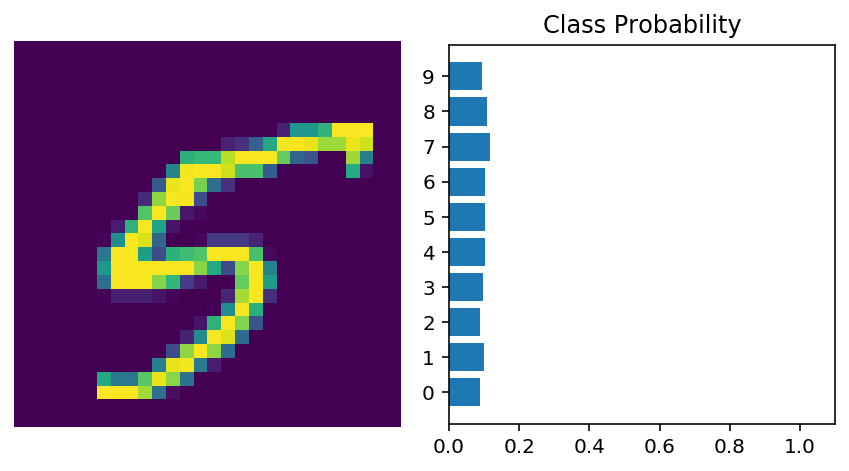

In [56]:
import helper
img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


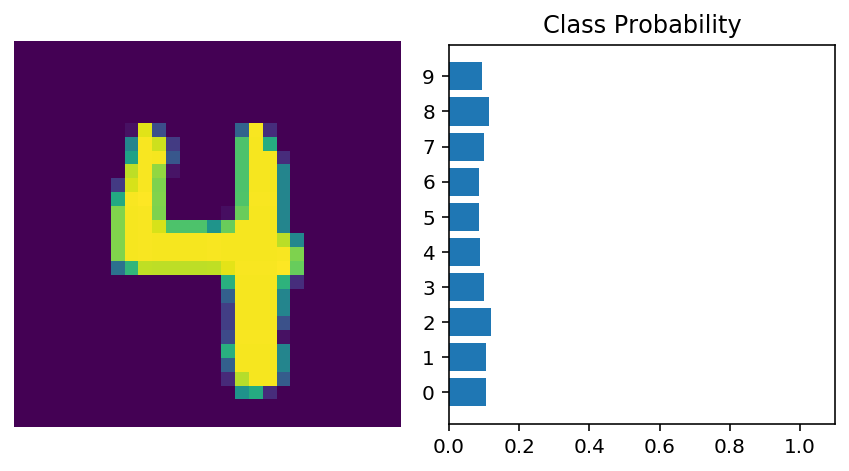

In [57]:
# PyTorch provides a convenient way to build networks 
# like this where a tensor is passed sequentially through operations,
# nn.Sequential (documentation). Using this to build the equivalent network:

input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))

print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [58]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0291, -0.0046, -0.0316,  ..., -0.0062, -0.0155, -0.0008],
        [ 0.0341, -0.0132,  0.0150,  ..., -0.0305,  0.0291, -0.0057],
        [ 0.0058, -0.0294, -0.0057,  ..., -0.0318, -0.0068,  0.0159],
        ...,
        [-0.0217,  0.0039, -0.0044,  ...,  0.0086, -0.0354,  0.0248],
        [-0.0298,  0.0250,  0.0021,  ..., -0.0273, -0.0230,  0.0326],
        [-0.0096, -0.0205,  0.0271,  ..., -0.0044, -0.0174,  0.0032]],
       requires_grad=True)

In [59]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                        ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                        ('relu1', nn.ReLU()),
                        ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                        ('relu2', nn.ReLU()),
                        ('output', nn.Linear(hidden_sizes[1], output_size)),
                        ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [60]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
